**<center><font size = "6">Hyperparameters Logistic Regression<center>**
***

<h1>Índice<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Parámetros-por-defecto" data-toc-modified-id="Parámetros-por-defecto-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Parámetros por defecto</a></span></li><li><span><a href="#Penalty-=-none" data-toc-modified-id="Penalty-=-none-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Penalty = none</a></span></li><li><span><a href="#Solver-=-newton-cg" data-toc-modified-id="Solver-=-newton-cg-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Solver = newton-cg</a></span></li><li><span><a href="#Penalty-=-none,-solver-=-newton-cg" data-toc-modified-id="Penalty-=-none,-solver-=-newton-cg-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Penalty = none, solver = newton-cg</a></span></li><li><span><a href="#Penalty-=-l1,-solver-=-liblinear,-multi_class-=-ovr" data-toc-modified-id="Penalty-=-l1,-solver-=-liblinear,-multi_class-=-ovr-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Penalty = l1, solver = liblinear, multi_class = ovr</a></span></li><li><span><a href="#Dual-=-True,-solver-=-liblinear,-multi_class-=-ovr" data-toc-modified-id="Dual-=-True,-solver-=-liblinear,-multi_class-=-ovr-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Dual = True, solver = liblinear, multi_class = ovr</a></span></li><li><span><a href="#Solver-=-sag" data-toc-modified-id="Solver-=-sag-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Solver = sag</a></span></li><li><span><a href="#Penalty-=-none,-solver-=-sag" data-toc-modified-id="Penalty-=-none,-solver-=-sag-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Penalty = none, solver = sag</a></span></li><li><span><a href="#Penalty-=-elasticnet,-solver-=-saga,-l1_ratio=0.5" data-toc-modified-id="Penalty-=-elasticnet,-solver-=-saga,-l1_ratio=0.5-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Penalty = elasticnet, solver = saga, l1_ratio=0.5</a></span></li><li><span><a href="#Penalty-=-l1,-solver-=-saga" data-toc-modified-id="Penalty-=-l1,-solver-=-saga-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Penalty = l1, solver = saga</a></span></li><li><span><a href="#Solver-=-saga" data-toc-modified-id="Solver-=-saga-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Solver = saga</a></span></li><li><span><a href="#Penalty-=-none" data-toc-modified-id="Penalty-=-none-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Penalty = none</a></span></li></ul></div>

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split

import pickle

X_train_smt = pickle.load(open("saved_feats/ShuffleSplit_X_train_smt", "rb"))
X_test = pickle.load(open("saved_feats/ShuffleSplit_X_test", "rb"))
y_train_smt = pickle.load(open("saved_feats/ShuffleSplit_y_train_smt", "rb"))
y_test = pickle.load(open("saved_feats/ShuffleSplit_y_test", "rb"))

# FORMATO DE PLOTS
plt.style.use('bmh')

## Parámetros por defecto

In [2]:
clf_logit = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None,
                               random_state=None, solver='lbfgs', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit.fit(X_train_smt, y_train_smt)
pred_logit = clf_logit.predict(X_test)
pred_prob_logit = clf_logit.predict_proba(X_test)

In [3]:
print('Predicted classes:', clf_logit.classes_)
print('Average accuracy :', np.mean(
    pred_logit == y_test)*100)
print('Train accuracy :', (clf_logit.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 87.4701451405475
Train accuracy : 95.76680465207964
Test accuracy : 87.4701451405475

 CONFUSION MATRIX
[[  67   24   28]
 [  48  104   98]
 [  96  388 4590]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.32      0.56      0.41       119
     Neutral       0.20      0.42      0.27       250
    Positive       0.97      0.90      0.94      5074

    accuracy                           0.87      5443
   macro avg       0.50      0.63      0.54      5443
weighted avg       0.92      0.87      0.90      5443



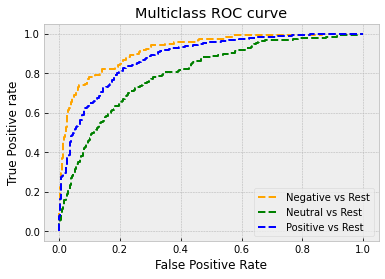

In [4]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty = none

In [5]:
clf_logit_2 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None,
                                 random_state=None, solver='lbfgs', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_2.fit(X_train_smt, y_train_smt)
pred_logit_2 = clf_logit_2.predict(X_test)
pred_prob_logit_2 = clf_logit_2.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
print('Predicted classes:', clf_logit_2.classes_)
print('Average accuracy :', np.mean(
    pred_logit_2 == y_test)*100)
print('Train accuracy :', (clf_logit_2.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_2.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_2))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_2))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 87.76410067977218
Train accuracy : 99.43327419672777
Test accuracy : 87.76410067977218

 CONFUSION MATRIX
[[  37   16   66]
 [  26   61  163]
 [  70  325 4679]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.28      0.31      0.29       119
     Neutral       0.15      0.24      0.19       250
    Positive       0.95      0.92      0.94      5074

    accuracy                           0.88      5443
   macro avg       0.46      0.49      0.47      5443
weighted avg       0.90      0.88      0.89      5443



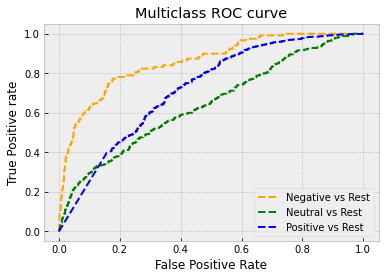

In [7]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_2[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_2[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_2[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Solver = newton-cg

In [8]:
clf_logit_3 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={
                                 'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93}, random_state=None, solver='newton-cg', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_3.fit(X_train_smt, y_train_smt)
pred_logit_3 = clf_logit_3.predict(X_test)
pred_prob_logit_3 = clf_logit_3.predict_proba(X_test)

In [9]:
print('Predicted classes:', clf_logit_3.classes_)
print('Average accuracy :', np.mean(
    pred_logit_3 == y_test)*100)
print('Train accuracy :', (clf_logit_3.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_3.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_3))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_3))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 90.02388388756201
Train accuracy : 93.24364281490243
Test accuracy : 90.02388388756201

 CONFUSION MATRIX
[[  49   30   40]
 [  31  101  118]
 [  38  286 4750]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.42      0.41      0.41       119
     Neutral       0.24      0.40      0.30       250
    Positive       0.97      0.94      0.95      5074

    accuracy                           0.90      5443
   macro avg       0.54      0.58      0.56      5443
weighted avg       0.92      0.90      0.91      5443



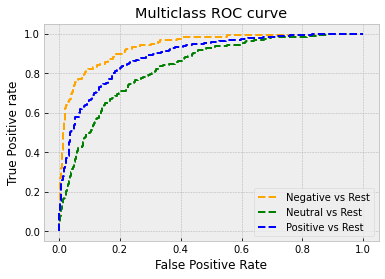

In [10]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_3[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_3[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_3[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty = none, solver = newton-cg

In [ ]:
clf_logit_4 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                 random_state=None, solver='newton-cg', max_iter=1000, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_4.fit(X_train_smt, y_train_smt)
pred_logit_4 = clf_logit_4.predict(X_test)
pred_prob_logit_4 = clf_logit_4.predict_proba(X_test)

In [ ]:
print('Predicted classes:', clf_logit_4.classes_)
print('Average accuracy :', np.mean(
    pred_logit_4 == y_test)*100)
print('Train accuracy :', (clf_logit_4.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_4.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_4))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_4))

In [ ]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_4[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_4[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_4[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty = l1, solver = liblinear, multi_class = ovr

In [11]:
clf_logit_5 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                 random_state=None, solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_5.fit(X_train_smt, y_train_smt)
pred_logit_5 = clf_logit_5.predict(X_test)
pred_prob_logit_5 = clf_logit_5.predict_proba(X_test)

In [12]:
print('Predicted classes:', clf_logit_5.classes_)
print('Average accuracy :', np.mean(
    pred_logit_5 == y_test)*100)
print('Train accuracy :', (clf_logit_5.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_5.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_5))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_5))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 88.59085063384164
Train accuracy : 94.57750180695183
Test accuracy : 88.59085063384164

 CONFUSION MATRIX
[[  61   23   35]
 [  42   97  111]
 [  64  346 4664]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.37      0.51      0.43       119
     Neutral       0.21      0.39      0.27       250
    Positive       0.97      0.92      0.94      5074

    accuracy                           0.89      5443
   macro avg       0.51      0.61      0.55      5443
weighted avg       0.92      0.89      0.90      5443



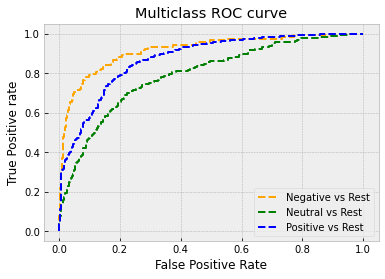

In [13]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_5[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_5[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_5[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Dual = True, solver = liblinear, multi_class = ovr

In [14]:
clf_logit_6 = LogisticRegression(penalty='l2', dual=True, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                 random_state=None, solver='liblinear', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_6.fit(X_train_smt, y_train_smt)
pred_logit_6 = clf_logit_6.predict(X_test)
pred_prob_logit_6 = clf_logit_6.predict_proba(X_test)

In [15]:
print('Predicted classes:', clf_logit_6.classes_)
print('Average accuracy :', np.mean(
    pred_logit_6 == y_test)*100)
print('Train accuracy :', (clf_logit_6.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_6.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_6))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_6))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 89.12364504868638
Train accuracy : 93.27813916814507
Test accuracy : 89.12364504868638

 CONFUSION MATRIX
[[  61   26   32]
 [  36  102  112]
 [  55  331 4688]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.40      0.51      0.45       119
     Neutral       0.22      0.41      0.29       250
    Positive       0.97      0.92      0.95      5074

    accuracy                           0.89      5443
   macro avg       0.53      0.61      0.56      5443
weighted avg       0.92      0.89      0.91      5443



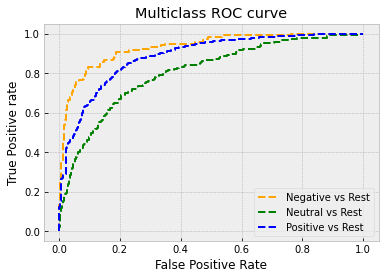

In [16]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_6[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_6[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_6[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Solver = sag

In [17]:
clf_logit_7 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                 random_state=None, solver='sag', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_7.fit(X_train_smt, y_train_smt)
pred_logit_7 = clf_logit_7.predict(X_test)
pred_prob_logit_7 = clf_logit_7.predict_proba(X_test)

In [18]:
print('Predicted classes:', clf_logit_7.classes_)
print('Average accuracy :', np.mean(
    pred_logit_7 == y_test)*100)
print('Train accuracy :', (clf_logit_7.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_7.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_7))
print('\nCLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_7))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 90.13411721477127
Train accuracy : 91.08844207898022
Test accuracy : 90.13411721477127

 CONFUSION MATRIX
[[  50   30   39]
 [  31  102  117]
 [  40  280 4754]]

CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.41      0.42      0.42       119
     Neutral       0.25      0.41      0.31       250
    Positive       0.97      0.94      0.95      5074

    accuracy                           0.90      5443
   macro avg       0.54      0.59      0.56      5443
weighted avg       0.92      0.90      0.91      5443



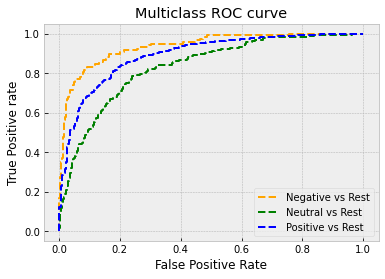

In [19]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_7[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_7[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_7[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty = none, solver = sag

In [20]:
clf_logit_8 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                 random_state=None, solver='sag', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_8.fit(X_train_smt, y_train_smt)
pred_logit_8 = clf_logit_8.predict(X_test)
pred_prob_logit_8 = clf_logit_8.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [21]:
print('Predicted classes:', clf_logit_8.classes_)
print('Average accuracy :', np.mean(
    pred_logit_8 == y_test)*100)
print('Train accuracy :', (clf_logit_8.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_8.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_8))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_8))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 88.62759507624472
Train accuracy : 99.0160325908404
Test accuracy : 88.62759507624472

 CONFUSION MATRIX
[[  30   22   67]
 [  26   63  161]
 [  63  280 4731]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.25      0.25      0.25       119
     Neutral       0.17      0.25      0.20       250
    Positive       0.95      0.93      0.94      5074

    accuracy                           0.89      5443
   macro avg       0.46      0.48      0.47      5443
weighted avg       0.90      0.89      0.89      5443



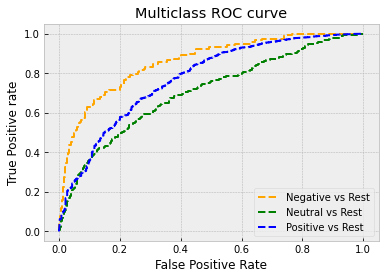

In [22]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_8[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_8[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_8[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty = elasticnet, solver = saga, l1_ratio=0.5

In [23]:
clf_logit_9 = LogisticRegression(penalty='elasticnet', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                 random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=0.5)
clf_logit_9.fit(X_train_smt, y_train_smt)
pred_logit_9 = clf_logit_9.predict(X_test)
pred_prob_logit_9 = clf_logit_9.predict_proba(X_test)

In [24]:
print('Predicted classes:', clf_logit_9.classes_)
print('Average accuracy :', np.mean(
    pred_logit_9 == y_test)*100)
print('Train accuracy :', (clf_logit_9.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_9.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_9))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_9))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 90.00551166636046
Train accuracy : 90.86010907418358
Test accuracy : 90.00551166636046

 CONFUSION MATRIX
[[  49   32   38]
 [  33  104  113]
 [  42  286 4746]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.40      0.41      0.40       119
     Neutral       0.25      0.42      0.31       250
    Positive       0.97      0.94      0.95      5074

    accuracy                           0.90      5443
   macro avg       0.54      0.59      0.55      5443
weighted avg       0.92      0.90      0.91      5443



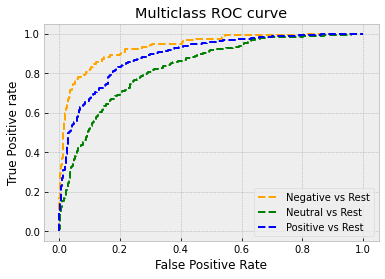

In [25]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_9[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_9[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_9[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty = l1, solver = saga

In [26]:
clf_logit_10 = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                  random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_10.fit(X_train_smt, y_train_smt)
pred_logit_10 = clf_logit_10.predict(X_test)
pred_prob_logit_10 = clf_logit_10.predict_proba(X_test)

In [27]:
print('Predicted classes:', clf_logit_10.classes_)
print('Average accuracy :', np.mean(
    pred_logit_10 == y_test)*100)
print('Train accuracy :', (clf_logit_10.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_10.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_10))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_10))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 89.72992834833732
Train accuracy : 92.28760102503449
Test accuracy : 89.72992834833732

 CONFUSION MATRIX
[[  56   25   38]
 [  35   95  120]
 [  44  297 4733]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.41      0.47      0.44       119
     Neutral       0.23      0.38      0.28       250
    Positive       0.97      0.93      0.95      5074

    accuracy                           0.90      5443
   macro avg       0.54      0.59      0.56      5443
weighted avg       0.92      0.90      0.91      5443



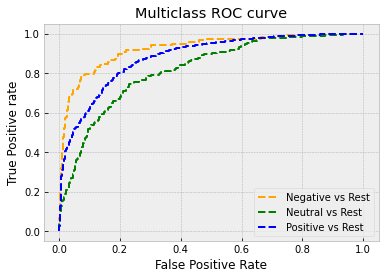

In [28]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_10[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_10[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_10[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Solver = saga

In [29]:
clf_logit_11 = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                  random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_11.fit(X_train_smt, y_train_smt)
pred_logit_11 = clf_logit_11.predict(X_test)
pred_prob_logit_11 = clf_logit_11.predict_proba(X_test)

In [30]:
print('Predicted classes:', clf_logit_11.classes_)
print('Average accuracy :', np.mean(
    pred_logit_11 == y_test)*100)
print('Train accuracy :', (clf_logit_11.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_11.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_11))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_11))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 90.13411721477127
Train accuracy : 91.0950128129312
Test accuracy : 90.13411721477127

 CONFUSION MATRIX
[[  50   30   39]
 [  31  102  117]
 [  40  280 4754]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.41      0.42      0.42       119
     Neutral       0.25      0.41      0.31       250
    Positive       0.97      0.94      0.95      5074

    accuracy                           0.90      5443
   macro avg       0.54      0.59      0.56      5443
weighted avg       0.92      0.90      0.91      5443



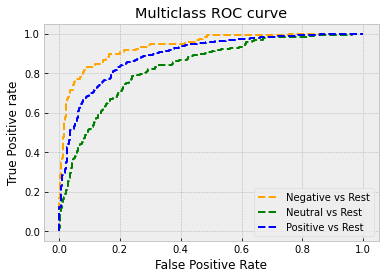

In [31]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_11[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_11[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_11[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

## Penalty = none

In [32]:
clf_logit_12 = LogisticRegression(penalty='none', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight={'Negative': 0.2, 'Neutral': 0.5, 'Positive': 0.93},
                                  random_state=None, solver='saga', max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
clf_logit_12.fit(X_train_smt, y_train_smt)
pred_logit_12 = clf_logit_12.predict(X_test)
pred_prob_logit_12 = clf_logit_12.predict_proba(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [33]:
print('Predicted classes:', clf_logit_12.classes_)
print('Average accuracy :', np.mean(
    pred_logit_12 == y_test)*100)
print('Train accuracy :', (clf_logit_12.score(
    X_train_smt, y_train_smt))*100)
print('Test accuracy :', (clf_logit_12.score(
    X_test, y_test))*100)

print('\n CONFUSION MATRIX')
print(confusion_matrix(y_test, pred_logit_12))
print('\n CLASSIFICATION REPORT')
print(classification_report(y_test, pred_logit_12))

Predicted classes: ['Negative' 'Neutral' 'Positive']
Average accuracy : 88.8296895094617
Train accuracy : 98.93882646691635
Test accuracy : 88.8296895094617

 CONFUSION MATRIX
[[  28   23   68]
 [  23   64  163]
 [  66  265 4743]]

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

    Negative       0.24      0.24      0.24       119
     Neutral       0.18      0.26      0.21       250
    Positive       0.95      0.93      0.94      5074

    accuracy                           0.89      5443
   macro avg       0.46      0.48      0.46      5443
weighted avg       0.90      0.89      0.90      5443



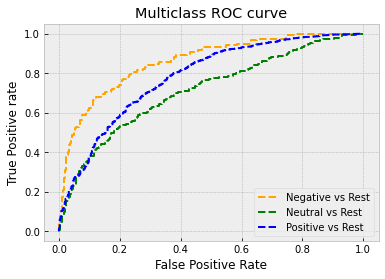

In [34]:
fpr = {}
tpr = {}
thresh = {}

fpr[0], tpr[0], thresh[0] = roc_curve(
    y_test, pred_prob_logit_12[:, 0], pos_label='Negative')
fpr[1], tpr[1], thresh[1] = roc_curve(
    y_test, pred_prob_logit_12[:, 1], pos_label='Neutral')
fpr[2], tpr[2], thresh[2] = roc_curve(
    y_test, pred_prob_logit_12[:, 2], pos_label='Positive')

# plotting
plt.plot(fpr[0], tpr[0], linestyle='--',
         color='orange', label='Negative vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',
         color='green', label='Neutral vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',
         color='blue', label='Positive vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')